# CS4055 Project

14161044 - Oliver Gavin

14117495 - Jonathan Lloyd

13148583 - Jay Conroy

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.max_columns', None)

from matplotlib.colors import LinearSegmentedColormap
binary_cmap = LinearSegmentedColormap.from_list('binarycmap', [(0.12156862745098039, 0.46666666666666667, 0.70588235294117652),
 (1.0, 0.49803921568627452, 0.054901960784313725)])

Utility functions - move to module

In [2]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in
    
    Source: http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.
    
    Source: http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def plot_classifier(clf, ax, X0, X1, y, title, xlabel, ylabel):
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax, clf, xx, yy, cmap=binary_cmap, alpha=0.3)
    ax.scatter(X0, X1, c=y, s=20, cmap=binary_cmap, alpha=0.7)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)


## Dataset Description
(5 marks) Describe the meaning of all attributes in your dataset and cite the source of the dataset.

Source: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

Attribute Information:

    1) ID number
    2) Diagnosis (M = malignant, B = benign)
    3-32) Ten real-valued features are computed for each cell nucleus:

        a) radius (mean of distances from center to points on the perimeter)
        b) texture (standard deviation of gray-scale values)
        c) perimeter
        d) area
        e) smoothness (local variation in radius lengths)
        f) compactness (perimeter^2 / area - 1.0)
        g) concavity (severity of concave portions of the contour)
        h) concave points (number of concave portions of the contour)
        i) symmetry
        j) fractal dimension ("coastline approximation" - 1)
        
The mean, standard error, and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.  For instance, attribute 3 is Mean Radius, attribute
13 is Radius SE, attribute 23 is Worst Radius.

In [3]:
raw_data = pd.read_csv('breast-cancer/data.csv')


In [4]:
# Some raw data
raw_data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


## 1. Dataset Preperation
(5 marks)
Pick a dataset with at least 200 data rows and prepare it for data mining. This may include one or more of
the following:

    a. Clean the data: remove outliers, remove corrupt or incorrect data rows, etc.
    b. Discretize some numeric attributes, i.e. transform them to nominal.
    c. Select features (i.e. attributes).

### Cleaning the data
The data shown above suffers from a slight problem; a column 'Unamed: 32' is introduced because the source data contains a trailing delimiter. This can be firstly removed, along with the 'id' column.

In [5]:
clean_data = raw_data.drop(['id', 'Unnamed: 32'], axis=1)

### Discretizing some numeric attributes
The diagnosis is binary, either malignant or benign, so this attribute can be converted to numeric values

In [6]:
BENIGN = 0
MALIGNANT = 1
clean_data['diagnosis'] = clean_data['diagnosis'].map({'B':BENIGN,'M':MALIGNANT})


Other attributes?

### Preliminary Insights & Visualisations
Bar chart for diagnosis, bar chart separated classes for rest -> logistic regression?, plot against in scatter?

In [7]:
class_distribution = clean_data['diagnosis'].value_counts()

print('Benign: ', class_distribution[BENIGN])
print('Malignant: ', class_distribution[MALIGNANT])

Benign:  357
Malignant:  212


#### Distribution and Pairwise Relationships
The matrix below gives us two key insights useful for selecting possibly good attributes. It models only the 'mean' values in the dataset, but similar observations can be seen for 'worst' values. However 'se' (standard error) values show less interesting results.

The diagonal shows the distribution of a single attribute for both classes.

The other plots show scatter plots for each pair of attributes. There is a clear correlation between area, perimeter and radius.

This visualisation can help for initial ideas on how this dataset may be classified.

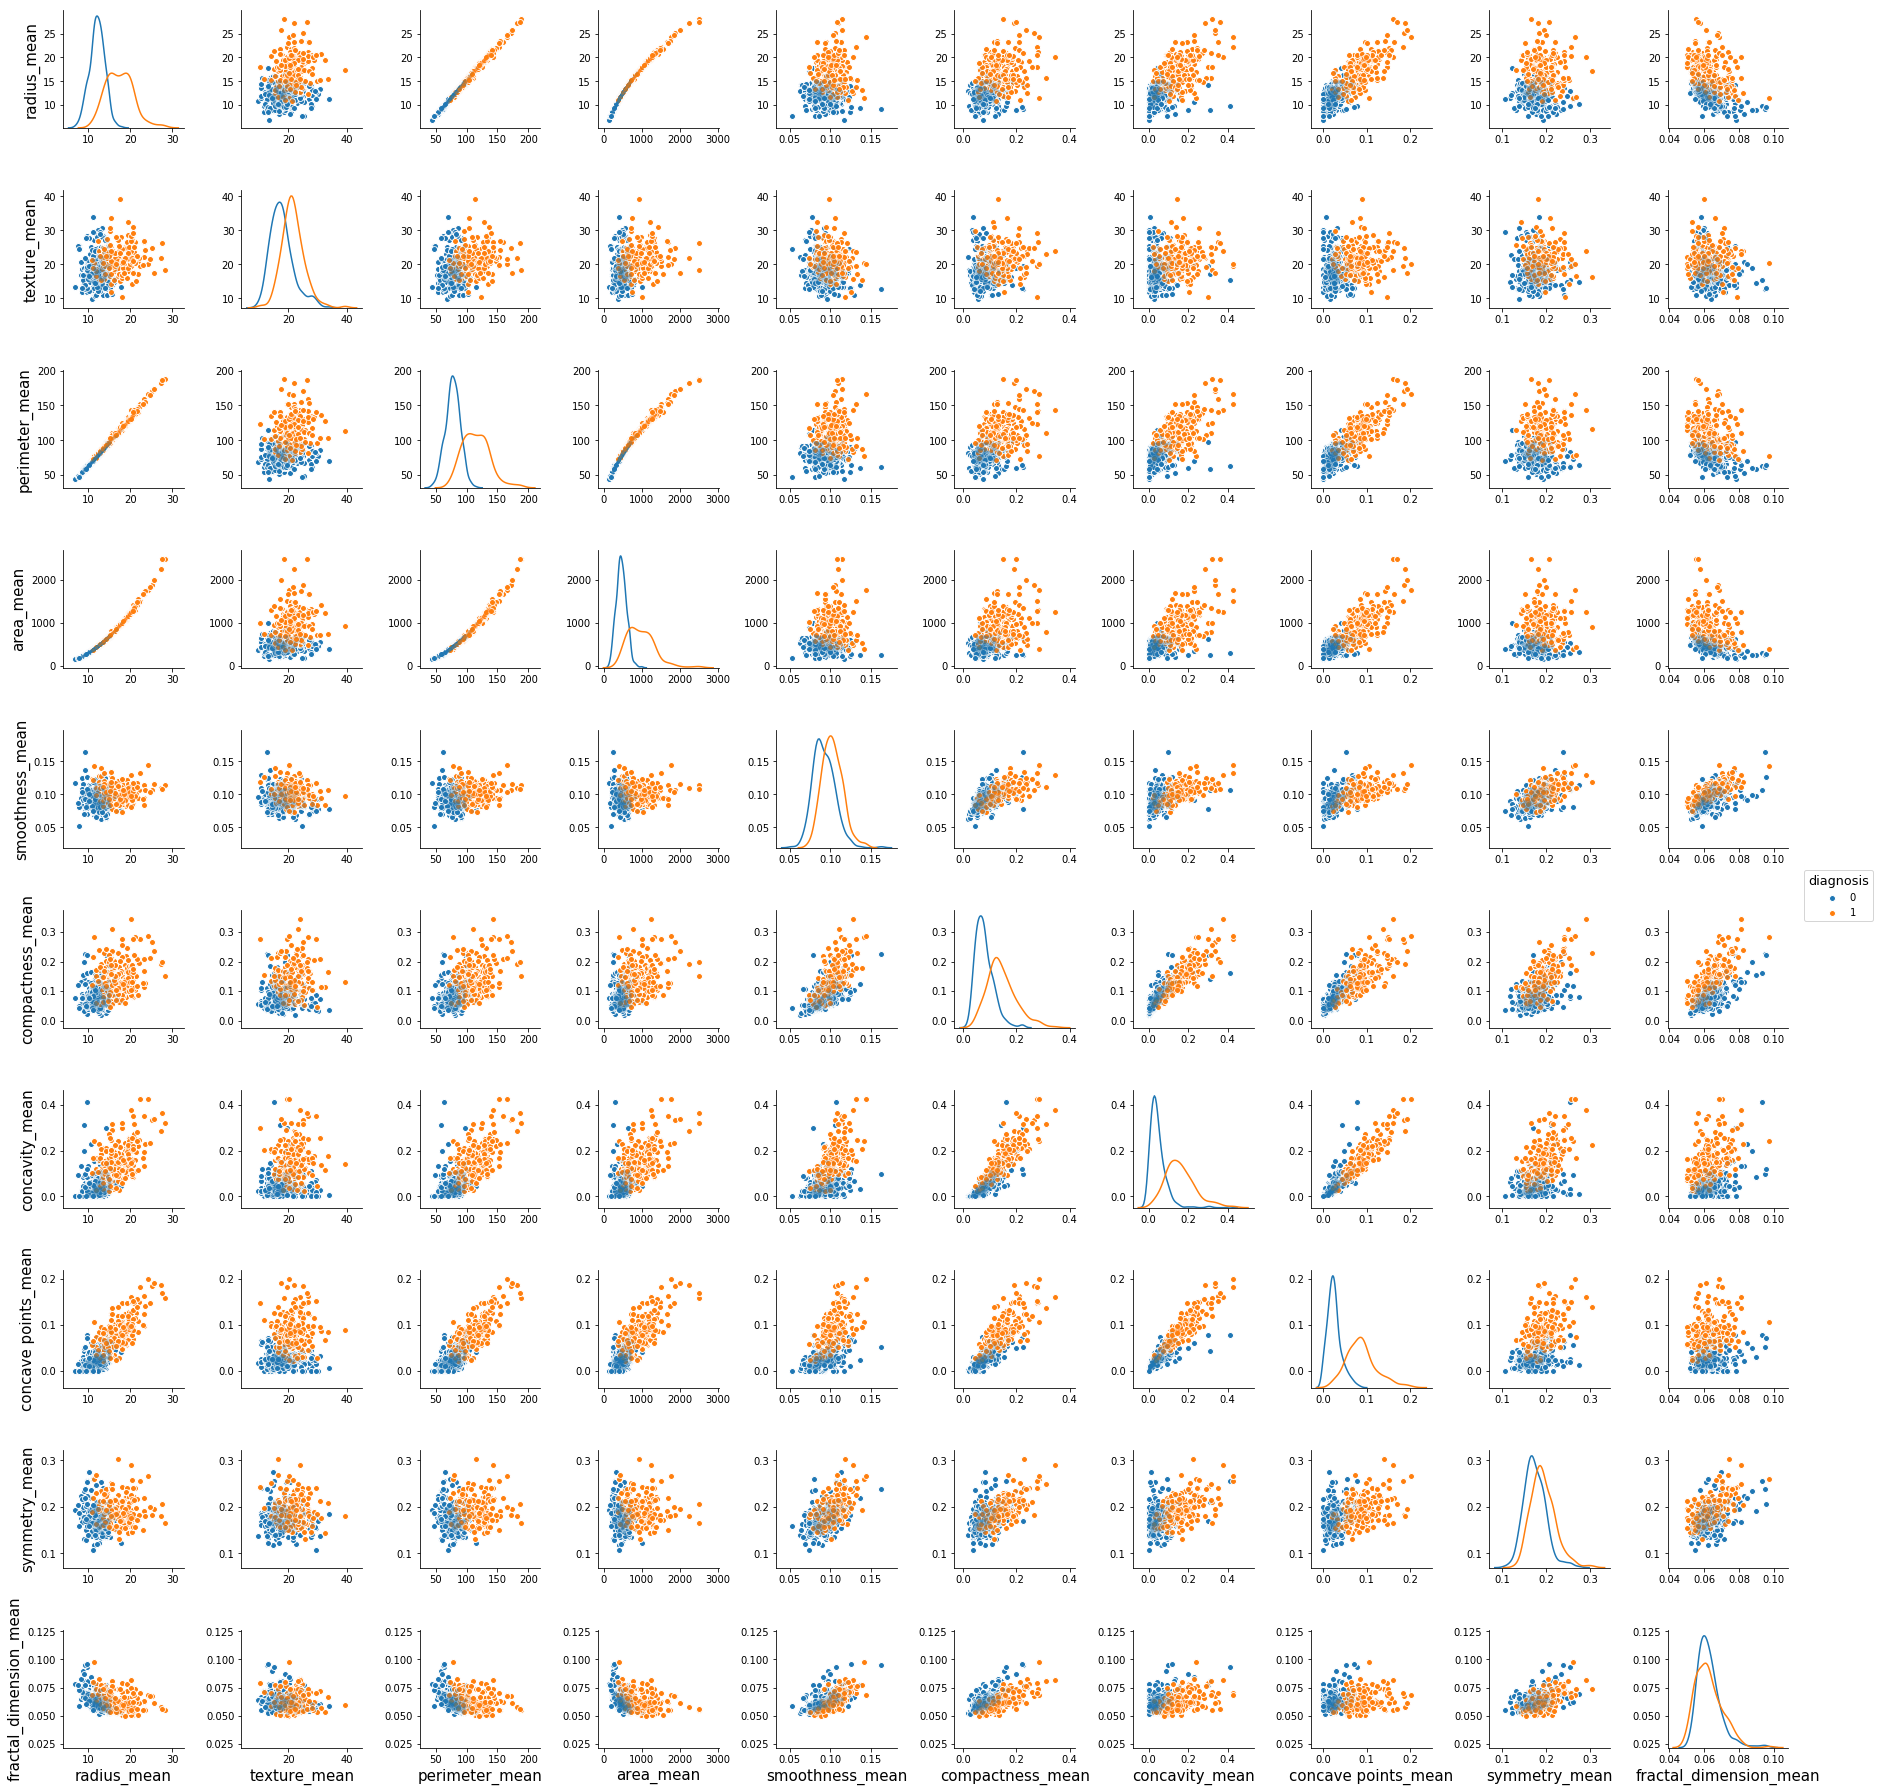

In [8]:
mean_labels = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
se_labels = ['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']
worst_labels = ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

plt.rcParams["axes.labelsize"] = 15

g = sns.pairplot(clean_data, vars=mean_labels, hue='diagnosis', diag_kind="kde")
g = g.map_offdiag(plt.scatter, s=5, alpha=0.1)

In [9]:
data = clean_data.copy()

### Spliting into testing and training data

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[mean_labels], data['diagnosis'],
                                                    test_size=0.3, shuffle=True)

### Manual Feature Selection
The 'mean' attributes seem appropriate for initial explorations.

Interesting single attributes based on distribution (suitable for OneR, logistic regression):

    1) concave points_mean
    2) concavity_mean
    3) radius_mean
    4) perimeter_mean
    5) compactness_mean
    
Other interesting combinations of attributes may be used for better insights (SVN, naive bayes, k-nearest neighbours, k-means).

Since we are using an automated approach, there is little need to select any features, however it is useful to note the ones we expect to be valuable.

### Automated Feature Selection
These methods produce similar results to manual selection

In [11]:
# Recursive Feature Elimination selecting the best 5 attributes
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model, 5)
rfe = rfe.fit(data[mean_labels], data['diagnosis'])
sorted(list(zip(mean_labels, rfe.ranking_)), key=lambda x: x[1])

[('radius_mean', 1),
 ('perimeter_mean', 1),
 ('concavity_mean', 1),
 ('concave points_mean', 1),
 ('symmetry_mean', 1),
 ('fractal_dimension_mean', 2),
 ('smoothness_mean', 3),
 ('texture_mean', 4),
 ('compactness_mean', 5),
 ('area_mean', 6)]

In [12]:
# Extra Trees Classifier showing relative importance of each attribute
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(data[mean_labels], data['diagnosis'])
sorted(list(zip(mean_labels, model.feature_importances_)), key=lambda x: x[1], reverse=True)

[('concave points_mean', 0.20869366107507359),
 ('radius_mean', 0.14626636844949481),
 ('perimeter_mean', 0.14493776190869215),
 ('area_mean', 0.13963633335212378),
 ('concavity_mean', 0.093629441350167597),
 ('compactness_mean', 0.092034781129232315),
 ('texture_mean', 0.085132657146884352),
 ('smoothness_mean', 0.036545494265490086),
 ('symmetry_mean', 0.026997528130335458),
 ('fractal_dimension_mean', 0.026125973192505907)]

In [ ]:
# Extra Trees Classifier showing relative importance of each attribute
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(criterion='entropy')
model.fit(data[mean_labels], data['diagnosis'])
sorted(list(zip(mean_labels, model.feature_importances_)), key=lambda x: x[1], reverse=True)

[('concave points_mean', 0.30244387150153446),
 ('radius_mean', 0.16786622505069482),
 ('area_mean', 0.14781370266407412),
 ('concavity_mean', 0.087365079146410618),
 ('perimeter_mean', 0.077398406196793099),
 ('compactness_mean', 0.060003657565218659),
 ('texture_mean', 0.059680171664108647),
 ('symmetry_mean', 0.03644951845890964),
 ('smoothness_mean', 0.032486814471436962),
 ('fractal_dimension_mean', 0.028492553280819032)]

In [ ]:
g = sns.pairplot(clean_data, vars=['radius_mean', 'perimeter_mean', 'concavity_mean', 'concave points_mean', 'area_mean'], hue='diagnosis', diag_kind="kde")
g = g.map_offdiag(plt.scatter, s=5, alpha=0.1)

Ignoring the highly correlated features, radius_mean and concavity_mean, for example, may be good features.

In [ ]:
features = ['radius_mean', 'concavity_mean']

### Standardisation
Many algorithms require the data to be somewhat normalised or standardised to perform accurately and avoid skewed results.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)

standardized_X_train = X_train.copy()
standardized_X_train[standardized_X_train.columns] = scaler.fit_transform(standardized_X_train[standardized_X_train.columns])

standardized_X_test = X_test.copy()
standardized_X_test[standardized_X_test.columns] = scaler.fit_transform(standardized_X_test[standardized_X_test.columns])


## 2. Predictive Analytics
(30 marks)

• Pick either a nominal class attribute or a numeric attribute and apply a few different data mining
algorithms for building classification and/or numeric prediction models. Tune algorithm parameters and
evaluate the models by following the data mining workflow guidelines in Lecture 9.

• Apply at least one algorithm that has not been covered in class (for example, some of the algorithms in
chapter 6 of Witten, Frank and Hall’s book “Data Mining (Practical Machine Learning Tools and
Techniques)”.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.grid_search import GridSearchCV

### KNN

In [ ]:
from sklearn import neighbors

#### Experiment with 2 attributes and manual parameter selection

In [ ]:
X = standardized_X_train[features].values
y = y_train.values

##### Classification

In [ ]:
clf = neighbors.KNeighborsClassifier(n_neighbors=4)
clf.fit(X, y)

##### Prediction

In [ ]:
y_pred = clf.predict(standardized_X_test[features].values)

##### Accuracy Score

In [ ]:
accuracy_score(y_test, y_pred)

##### Classification Report

In [ ]:
print(classification_report(y_test, y_pred))

##### Confusion Matrix

In [ ]:
print(confusion_matrix(y_test, y_pred))

##### Cross Validation

In [ ]:
print(cross_val_score(clf, standardized_X_test[features], y_test, cv=4))

##### Visualisation

In [ ]:
fig = plt.plot(figsize=(10,5))
ax = plt.gca()
X0, X1 = X[:, 0], X[:, 1]
plot_classifier(clf, ax, X0, X1, y, title='KNN', xlabel=features[0], ylabel=features[1])

#### Experiment with 2 attributes and automated parameter selection

In [ ]:
params = {
    "n_neighbors": np.arange(1,5), 
    "metric": [
        "euclidean",
        "cityblock"
    ]
}
grid = GridSearchCV(estimator=clf, param_grid=params, cv=4)
grid.fit(X, y)
print('Best score on training data: ', grid.best_score_)
print('Best parameters:')
print('\tK-neighbours:\t', grid.best_estimator_.n_neighbors)
print('\tDistance metric:', grid.best_estimator_.metric)

##### Cross Validation

In [ ]:
print(cross_val_score(grid.best_estimator_, standardized_X_test[features], y_test, cv=4))

##### Confusion Matrix

In [ ]:
y_pred = grid.best_estimator_.predict(standardized_X_test[features].values)
print(confusion_matrix(y_test, y_pred))

In [ ]:
fig = plt.plot(figsize=(10,5))
ax = plt.gca()
X0, X1 = X[:, 0], X[:, 1]
plot_classifier(grid.best_estimator_, ax, X0, X1, y, title='KNN', xlabel=features[0], ylabel=features[1])

Despite the difference in parameters, the cross validation result was almost identical

#### KNN with all attributes and automated parameter selection

In [ ]:
X = standardized_X_train.values
y = y_train.values

In [ ]:
params = {
    "n_neighbors": np.arange(1,5), 
    "metric": [
        "euclidean",
        "cityblock"
    ]
}
grid = GridSearchCV(estimator=clf, param_grid=params, cv=4)
grid.fit(X, y)
print('Best score on training data: ', grid.best_score_)
print('Best parameters:')
print('\tK-neighbours:\t', grid.best_estimator_.n_neighbors)
print('\tDistance metric:', grid.best_estimator_.metric)

##### Cross Validation

In [ ]:
print(cross_val_score(grid.best_estimator_, standardized_X_test, y_test, cv=4))

##### Confusion Matrix

In [ ]:
y_pred = grid.best_estimator_.predict(standardized_X_test.values)
print(confusion_matrix(y_test, y_pred))

##### Conclusion
The inclusion of all attributes only improved results slightly which indicates that the chosen attributes were good.

Both the number of false positives and false negatives decreased.


### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

#### Experiment with 2 attributes

In [ ]:
X = standardized_X_train[features].values
y = y_train.values

##### Classification

In [ ]:
clf = GaussianNB()
clf.fit(X, y)

##### Prediction

In [ ]:
y_pred = clf.predict(standardized_X_test[features].values)

##### Accuracy Score

In [ ]:
accuracy_score(y_test, y_pred)

##### Classification Report

In [ ]:
print(classification_report(y_test, y_pred))

##### Confusion Matrix

In [ ]:
print(confusion_matrix(y_test, y_pred))

##### Cross Validation

In [ ]:
print(cross_val_score(clf, standardized_X_test[features], y_test, cv=4))

##### Visualisation

In [ ]:
fig = plt.plot(figsize=(10,5))
ax = plt.gca()
X0, X1 = X[:, 0], X[:, 1]
plot_classifier(clf, ax, X0, X1, y, title='Naive Bayes', xlabel=features[0], ylabel=features[1])

#### Naive Bayes all attributes

In [ ]:
X = standardized_X_train.values
y = y_train.values

##### Classification

In [ ]:
clf = GaussianNB()
clf.fit(X, y)

##### Prediction

In [ ]:
y_pred = clf.predict(standardized_X_test.values)

##### Accuracy Score

In [ ]:
accuracy_score(y_test, y_pred)

##### Classification Report

In [ ]:
print(classification_report(y_test, y_pred))

##### Confusion Matrix

In [ ]:
print(confusion_matrix(y_test, y_pred))

##### Cross Validation

In [ ]:
print(cross_val_score(clf, standardized_X_test[features], y_test, cv=4))

##### Conclusion
There is little difference with the added attributes

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

##### Experiment with 2 attributes and manual parameter selection

In [ ]:
X = standardized_X_train[features].values
y = y_train.values

##### Classification

In [ ]:
clf = LogisticRegression()
clf.fit(X, y)

##### Prediction

In [ ]:
y_pred = clf.predict(standardized_X_test[features].values)

##### Accuracy Score

In [ ]:
accuracy_score(y_test, y_pred)

##### Classification Report

In [ ]:
print(classification_report(y_test, y_pred))

##### Confusion Matrix

In [ ]:
print(confusion_matrix(y_test, y_pred))

##### Cross Validation

In [ ]:
print(cross_val_score(clf, standardized_X_test[features], y_test, cv=4))

##### Visualisation

In [ ]:
fig = plt.plot(figsize=(10,5))
ax = plt.gca()
X0, X1 = X[:, 0], X[:, 1]
plot_classifier(clf, ax, X0, X1, y, title='Logistic Regression', xlabel=features[0], ylabel=features[1])

plt.show()

##### Experiment with 2 attributes and automated parameter selection

In [ ]:
from sklearn.grid_search import GridSearchCV
params = {
    "C": [0.001,0.01,0.1,1,10,100]
}
grid = GridSearchCV(estimator=clf, param_grid=params, cv=4)
grid.fit(X, y)
print('Best score on training data: ', grid.best_score_)
print('Best parameters:')
print('\tC:\t', grid.best_estimator_.C)

##### Cross Validation

In [ ]:
print(cross_val_score(grid.best_estimator_, standardized_X_test[features], y_test, cv=4))

##### Confusion Matrix

In [ ]:
y_pred = grid.best_estimator_.predict(standardized_X_test[features].values)
print(confusion_matrix(y_test, y_pred))

The number of false positives decreased from 14 to 8

In [ ]:
fig = plt.plot(figsize=(10,5))
ax = plt.gca()
X0, X1 = X[:, 0], X[:, 1]
plot_classifier(grid.best_estimator_, ax, X0, X1, y, title='KNN', xlabel=features[0], ylabel=features[1])

plt.show()

#### Logistic regression with all attributes and automated parameter selection

In [ ]:
X = standardized_X_train.values
y = y_train.values

In [ ]:
from sklearn.grid_search import GridSearchCV
params = {
    "C": [0.001,0.01,0.1,1,10,100]
}
grid = GridSearchCV(estimator=clf, param_grid=params, cv=4)
grid.fit(X, y)
print('Best score on training data: ', grid.best_score_)
print('Best parameters:')
print('\tC:\t', grid.best_estimator_.C)

##### Cross Validation

In [ ]:
print(cross_val_score(grid.best_estimator_, standardized_X_test, y_test, cv=4))

##### Confusion Matrix

In [ ]:
y_pred = grid.best_estimator_.predict(standardized_X_test.values)
print(confusion_matrix(y_test, y_pred))

##### Conclusion
The number of false negatives decreased from 7 to 4

### Support Vector Machines
Supervised learning technique.

Assumes that the data it works with is in a standard range, usually either 0 to 1, or -1 to 1 (roughly). So the normalization of feature vectors prior to feeding them to the SVM is very important.

Variables:
First are C (the slack variable cost) and γ (the width of the Gaussian if using an RBF kernel) values. Generally these are searched in exponential factors: for C, something like 0.1, 1, 10, 100, 1000; for γ, something like 0.1, 0.01, 0.001, 0.0001, 0.00001). If possible, you should try all combinations of C and γ to find the ones that give you the best accuracy (using cross-validation)

In [ ]:
from sklearn import svm

In [ ]:
clf = svm.SVC(C=1.0, gamma=0.001, kernel='linear', degree=3)
X = standardized_X_train[['radius_mean', 'concavity_mean']].values.reshape(-1,2)
y = y_train.values
clf.fit(X, y)

In [ ]:
y_pred = clf.predict(standardized_X_test[['radius_mean', 'concavity_mean']].values.reshape(-1, 2))

In [ ]:
(y_pred == y_test).sum() / len(y_pred)

In [ ]:
fig = plt.plot(figsize=(15,5))
ax = plt.gca()
X0, X1 = X[:, 0], X[:, 1]
plot_classifier(clf, ax, X0, X1, y, title='Linear SVN', xlabel='radius_mean', ylabel='concavity_mean')

plt.show()

In [ ]:
X = standardized_X_train[['radius_mean', 'concavity_mean']].values.reshape(-1,2)
y = y_train.values

# create instances of SVM and fit data
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.SVC(kernel='sigmoid', gamma=0.1, C=C),
          svm.SVC(kernel='rbf', gamma=0.3, C=C),
          svm.SVC(kernel='poly', gamma=0.5, degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('Linear kernel',
          'Sigmoid kernel',
          'RBF kernel',
          'Polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(1, 4, figsize=(20,5))

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_classifier(clf, ax, X0, X1, y, title, xlabel='radius_mean', ylabel='concavity_mean')

plt.show()

## 3. Descriptive Analytics
(20 marks)

• Discover a meaningful clustering of your dataset. Try k-Means and at least one clustering algorithm that
has not been covered in class.

• Create an insightful visualisation of your dataset.

### K-Means

K-means is a method of vector quantization that is popularily used in cluster analysis in data mining. It partitions n observations into k number of clusters where each observation belongs to the cluster with the nearest mean.

In [ ]:
from sklearn import preprocessing

In [ ]:
# Scaling the dataset
datas = pd.DataFrame(preprocessing.scale(clean_data.iloc[:,1:32]))
datas.columns = list(clean_data.iloc[:,1:32].columns)
datas['diagnosis'] = clean_data['diagnosis']
# Creating the high dimensional feature space X
data_drop = datas.drop('diagnosis',axis=1)
X = data_drop.values

In [ ]:
#Creating a 2D visualization to visualize the clusters
from sklearn.manifold import TSNE
tsne = TSNE(verbose=1, perplexity=40, n_iter= 4000)
Y = tsne.fit_transform(X)

Now we visualise the differences between the true labels and what KMeans concluded. We set the random state for the algorithm to provide consistency.

In [ ]:
from sklearn.cluster import KMeans
kmns = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=42, copy_x=True, n_jobs=1, algorithm='auto')
kY = kmns.fit_predict(X)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(Y[:,0],Y[:,1],  c=kY, cmap = "jet", edgecolor = "None", alpha=0.35)
ax1.set_title('k-means clustering plot')

ax2.scatter(Y[:,0],Y[:,1],  c = datas['diagnosis'], cmap = "jet", edgecolor = "None", alpha=0.35)
ax2.set_title('Actual clusters')

In [ ]:
centroids = kmns.cluster_centers_
labels = kmns.labels_

true1 = [True if i==1 else False for i in labels.tolist()]
true0 = [True if i==0 else False for i in labels.tolist()]

true1y = [True if i==1 else False for i in datas.diagnosis]
true0y = [True if i==0 else False for i in datas.diagnosis]


In [ ]:
count = 0
for m,i in enumerate(datas.columns.tolist()):
    for n,j in enumerate(datas.columns.tolist()):
        if i!=j and count <4:
            fig = plt.figure()
            
            ax1 = fig.add_subplot(121)
            ax1.scatter(datas[true1][i],datas[true1][j], c="b")
            ax1.scatter(datas[true0][i],datas[true0][j], c="y")
            ax1.scatter(centroids[:, m], centroids[:, n],
                        marker='x', s=169, linewidths=3,
                        color='r', zorder=10)
            title1 = "Clustered,"
            ax1.set_title(title1)
            ax1.set_xlabel(i)
            ax1.set_ylabel(j)
            
            ax2 = fig.add_subplot(122)
            ax2.scatter(datas[true1y][i],datas[true1y][j], c="y")
            ax2.scatter(datas[true0y][i],datas[true0y][j], c="b")
            title2 = "Actual "+ i + " vs " + j
            ax2.set_title(title2)
            ax2.set_xlabel(i)
            ax2.set_ylabel(j)

            plt.legend(['benign','malignant'])
            plt.show()
            count += 1

The red crosses on the left mark the centroids. There is a signigficant difference between our KMeans clusters and the true labels!

### Spectral clustering 

Spectral clustering makes use of the spectrum of the similarity matrix of the data to perform dimensionality reduction before clustering in fewer dimensions. Spectral Clustering is very useful when the structure of the individual clusters is highly non-convex or more generally when a measure of the center and spread of the cluster is not a suitable description of the complete cluster. 
In our case when calling 'fit', an affinity matrix is constructed using the Gaussian (aka RBF) kernel of the euclidean distanced d(X, X)

np.exp(-gamma * d(X,X) ** 2)

This is how adjusting gamma can be used to tweak the clustering results.


In [ ]:
from sklearn.cluster import SpectralClustering

# Edit gamma to optimize the clustering results
kmns = SpectralClustering(n_clusters=2,  gamma=0.5, affinity='rbf', eigen_tol=0.0, assign_labels='kmeans', degree=3, coef0=1, kernel_params=None, n_jobs=1)
kY = kmns.fit_predict(X)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)


ax1.scatter(Y[:,0],Y[:,1],  c=kY, cmap = "jet", edgecolor = "None", alpha=0.35)
ax1.set_title('Spectral clustering plot')

ax2.scatter(Y[:,0],Y[:,1],  c = datas['diagnosis'], cmap = "jet", edgecolor = "None", alpha=0.35)
ax2.set_title('Actual clusters')

## Conclusion
(30 marks)

Draw conclusions from your experiments. What did you discover in the data? Are your
discoveries implicit, previously unknown and potentially useful information? Why? Negative results, i.e.
nothing interesting discovered, are acceptable as long as you have shown that you have tried a variety of
algorithms and followed the workflow.